In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 69s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [12]:
#plt.imshow(x_train[12])

In [13]:
x_train[0].max()

255

In [14]:
x_train=x_train/255

In [15]:
x_test=x_test/255

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train=to_categorical(y_train,10)

In [20]:
y_cat_test=to_categorical(y_test,10)

In [21]:
y_train[0]

array([6], dtype=uint8)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [23]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 207s 4ms/sample - loss: 1.4859 - accuracy: 0.4632 - val_loss: 1.2480 - val_accuracy: 0.5581
Epoch 2/15
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.1407 - accuracy: 0.5953 - val_loss: 1.0577 - val_accuracy: 0.6261
Epoch 3/15
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.9855 - accuracy: 0.6547 - val_loss: 1.0213 - val_accuracy: 0.6410
Epoch 4/15
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.8772 - accuracy: 0.6935 - val_loss: 0.9664 - val_accuracy: 0.6645
Epoch 5/15
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.7837 - accuracy: 0.7244 - val_loss: 0.9187 - val_accuracy: 0.6817
Epoch 6/15
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.7033 - accuracy: 0.7526 - val_loss: 0.9198 - val_accuracy: 0.6925
Epoch 7/15
50000/50000 [==============================]

In [29]:
metrics=pd.DataFrame(model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.485892,0.46318,1.248006,0.5581
1,1.140716,0.59530,1.057717,0.6261
2,0.985491,0.65468,1.021312,0.6410
3,0.877226,0.69352,0.966380,0.6645
4,0.783704,0.72440,0.918674,0.6817
5,0.703280,0.75258,0.919804,0.6925
6,0.631926,0.77940,0.933429,0.6971


In [31]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

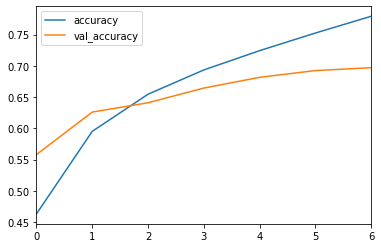

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

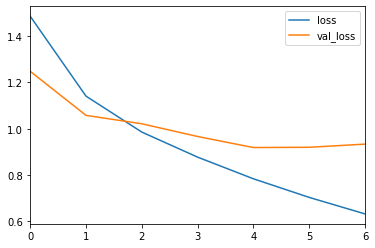

In [33]:
metrics[['loss', 'val_loss']].plot()

In [34]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9334294435501098, 0.6971]

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
predictions=model.predict_classes(x_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.85      0.79      0.82      1000
           2       0.64      0.54      0.59      1000
           3       0.47      0.59      0.52      1000
           4       0.60      0.74      0.66      1000
           5       0.70      0.47      0.56      1000
           6       0.75      0.75      0.75      1000
           7       0.75      0.74      0.75      1000
           8       0.80      0.81      0.80      1000
           9       0.75      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



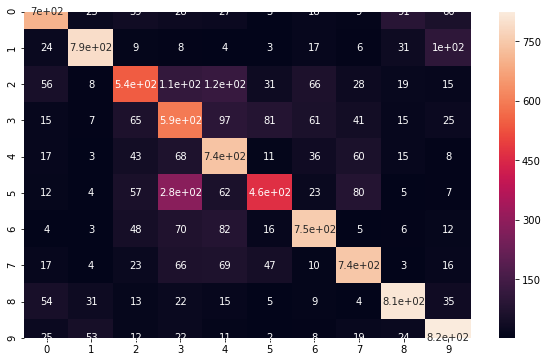

In [40]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [41]:
my_image=x_test[0]

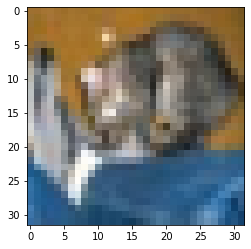

In [42]:
plt.imshow(my_image)

In [43]:
y_test[0]

array([3], dtype=uint8)

In [44]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)

In [45]:
my_image=x_test[16]

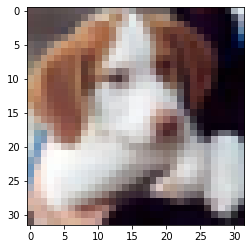

In [46]:
plt.imshow(my_image)

In [47]:
y_test[16]

array([5], dtype=uint8)

In [48]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)